# Lending Case Study - Automate Interest Rate Prediction for New Borrower
#### Author: Amelia B.

## Project Description

#### This project is related to the lending activity in the bank or financial institutions. 

##### In the case of lending activity, interest rate indicates the amount charged on top of the principal amount borrowed by a lender. The amount of interest rate charged by banks or financial institutions usually differs from one to another borrower. Several factors influence the interest rate charged for a loan. Typically, banks and financial institutions have criterias to check the borrower profile and loan request before determining the interest rate. Due to technology advancements, banks can improve their lending system with such an automatic recommendation of interest rate for new loan requests. Therefore, it is an essential aspect for banks and financial institutions to develop such a model to predict the right amount of interest rate for a new borrower. 

## Objective
##### This project aims to find a regression model that can give an accurate and best prediction to automate interest rate prediction for the new borrower. It uses a supervised machine learning method which the algorithm learn based on the available sample with the target output included, and find the combination of predictors, which will be used as an input indicators to generate the interest rate prediction for new/unseen observation. 

## Data Desciption

##### The dataset was published on Kaggle's lending club loan data. The data set consists of 75 variables with around 790,000 records of loan data which been issued between year 2007-2015. The variable description available in the seperate excel file.

## Model Building Plan and Process

#### Step 1: Data cleaning
##### This step is performed to filter out incomplete, inconsistent, and noisy data. First, we analyze the relationship between the independent variables to the dependent variable. Based on experts' information in this field, some independent variables happen/occur only after banks/financial institutions accept a loan and the interest rate is determined. In this case, we decide to filter out these independent variables (detailed can be found in the excel sheet). Second, we drop variables that match with one of the following circumstances: have a high amount of unique value, only have one level value, similar value with other variables (redundancy). Third, we clean the column that contains too many NAs values (more than 70%) and rows with missing NAs values. After performing these steps, 25 variables have remained in the training dataset.
#### Step 2: Variable transformation 
##### This step is performed to transform variables with data types' catagory/object' to 'numeric' because the regression model can only handle numeric input. Therefore, some will convert to ordinal numeric, while some will be one hot encode to binary variable. We also downsampling 'date' type variable from 'date-month-year' to merely 'year' to reduce granularity. This study also conducted transformation experiment, using log, square root, and box cox, has been applied into the numeric variables. At the end, the best normal test result demonstrate by the squareroot method. Hence, I will only present the squareroot method and result in this code.
#### Step 3: Exploratory Data Analysis and Cleaning noisy variable
##### This step is performed to fine-tune the data quality by analyzing if the data contains outliers and normally distributed. We use a boxplot and diagram to plot the variables from the dataset and analyze the distribution. Some variables were found out to contain outliers that need to be filtered out from the dataset. The data will not be normalized using scaler or normalization since the result will not be any different. The linear regression model does not matter for linear regression algorithm.
#### Step 4: Correlation checked
##### At first, the correlation between dependent and independent variables has been checked to get the general idea about which variable will contribute to the model. After get a general view about what variables may affect the model prediction, the study will start the main analysis of testing different linear regression models.
#### Step 5: Train and Test Split
##### The whole dataset will be splitted into train and test sample with weight 70:30. The target output also need to be separated, hence, you will find X and y split. X split represents the parameters (independent variable) and y split represents the target output variable (interest rate). It also will be used to compare and analyze deviation of the predicted output from the actual interest rate in the dataset.
#### Step 6: Regression Model Testing
##### In this section, I will test 3 different regression model, namely multilinear, Ridge, and Lasso. The model testing will include cross validation method which also use to find the hyper parameters (alpha/lambda) to give penalty for the high error and also to shrinkage some unrelated coefficient to zero. There will be two complrehensive tables consist of all MSE from test, train, and CV as well as adjusted R squared. The second table is comprise the comparison between actual taget output value and predicted value from each regression model.
#### Step 7: Conclusion
##### Finally, the conclusion is presented in this section, which model will be use including the explanation as well. I will highlight possible flaws in the model and a plan of action to revisit this analysis with additional data or different predictive modeling techniques. In brief, sugesstion that need to be taken for the next step and summary of this case study are presented in the last section.

##### Note: In the model building itself, you will find that several steps related to the Step 2 & Step 3 are mixed together.

# Model Building

### Import Package

In [1]:
import pandas as pd
import numpy as np
from scipy import stats 
import math
import seaborn as sns

### Load Dataset

In [2]:
path = 'C:/Users/ameli/Documents/Documents/IBM/Machine Learning/Loan Project/loan_dataset.csv'
path
#specify which path you use to save the csv file

'C:/Users/ameli/Documents/Documents/IBM/Machine Learning/Loan Project/loan_dataset.csv'

In [3]:
data = pd.read_csv(path)

## STEP 1: Data Cleaning

##### The goal of this project is to predict interest rate in new loan applications. First step that need to be take is exploring the dataset to evaluate attributes that play a role in determining interest rate in current and past loans.

In [5]:
data.head(n=10)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,417117,13376747,15418998,21600,21600,21600.0,36 months,17.57,776.25,D,...,NaN,NaN,NaN,NaN,NaN,NaN,63224.0,NaN,NaN,NaN
1,198726,1512316,1774514,3800,3800,3800.0,36 months,13.11,128.24,B,...,NaN,NaN,NaN,NaN,NaN,NaN,13400.0,NaN,NaN,NaN
2,650127,55150437,58721233,18000,18000,18000.0,36 months,7.26,557.94,A,...,NaN,NaN,NaN,NaN,NaN,NaN,69200.0,NaN,NaN,NaN
3,709660,51881744,55311612,21000,21000,21000.0,36 months,7.89,657.00,A,...,NaN,NaN,NaN,NaN,NaN,NaN,11100.0,NaN,NaN,NaN
4,807108,41810284,44757000,16000,16000,16000.0,60 months,10.99,347.80,B,...,NaN,NaN,NaN,NaN,NaN,NaN,28800.0,NaN,NaN,NaN
5,547316,63489415,67832283,14600,14600,14600.0,36 months,13.99,498.93,C,...,NaN,NaN,NaN,NaN,NaN,NaN,13900.0,NaN,NaN,NaN
6,179319,2380894,2843529,21000,21000,21000.0,36 months,6.03,639.15,A,...,NaN,NaN,NaN,NaN,NaN,NaN,8500.0,NaN,NaN,NaN
7,127428,5786716,7218865,15000,15000,14950.0,36 months,13.11,506.21,B,...,NaN,NaN,NaN,NaN,NaN,NaN,34400.0,NaN,NaN,NaN
8,336689,22423437,24756172,20000,20000,20000.0,36 months,12.99,673.79,C,...,NaN,NaN,NaN,NaN,NaN,NaN,68500.0,NaN,NaN,NaN
9,16324,732530,928742,25000,25000,25000.0,36 months,16.02,879.18,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#Make a copy of the original dataframe
loan_data = data.copy()

##### The dataset contains 75 variables in total. 
##### Based on experts' information in this field, some independent variables happen/occur only after banks/financial institutions accept a loan and the interest rate is determined. We will remove those since they are not relevant for predicting interest rate in new applications.

In [7]:
loan_data = loan_data.drop(['collection_recovery_fee', 'initial_list_status' , 'last_pymnt_amnt', 'last_pymnt_d' ,'loan_status','next_pymnt_d','out_prncp','out_prncp_inv','pymnt_plan','recoveries','total_pymnt','total_pymnt_inv','total_rec_int','total_rec_late_fee','total_rec_prncp','total_rev_hi_lim','last_credit_pull_d'], axis=1)

##### First, check and count the total of NaN value in each column in the dataframe.

In [ ]:
pd.set_option('max_rows', None)
percent_missing = loan_data.isnull().sum() * 100 / len(loan_data)
null_sum = loan_data.isnull().sum()
missing_value_df = pd.DataFrame({'%missing': percent_missing.round(2),'total_null': null_sum})
missing_value_df.sort_values(by = '%missing', ascending=False)

##### We see that there are many variables with a high amount of NAs. Columns containing variables with more than 70% NaN value will be dropped.

In [9]:
#Drop columns with more than 70% NaN value
loan_data = loan_data.loc[:, loan_data.isnull().sum() < 0.7*loan_data.shape[0]]

##### Check the remaining data frame after dropped columns with high ratio of NaN. The dataframe here display the amount of unique values and data type of each column. 
##### Notes: 
##### 1) The high amount of unique values in the variable 'object' need to be investigate further since it may contains irrelevant information.
##### 2) Check similarities of column which have similar unique values. It indicates that the column may contains exactly similar data.

In [ ]:
info = []

for col in loan_data.columns:

    nonNull = np.sum(pd.isna(loan_data[col]))
    unique = loan_data[col].nunique()
    colType = str(loan_data[col].dtype)

    info.append([col, nonNull, unique, colType])

info = pd.DataFrame(info)   
info.columns = ['colName','null values', 'unique', 'dtype']
info.sort_values(by='unique', ascending=True)

In [ ]:
#First, create dataframe for only variables with data type 'object'
object_var = loan_data.select_dtypes('object').head(n=20)
object_var
#In this table we can see some of the variables has unstructure input which cause high level of variability. These variables need to be removed since it will give less impact on the machine learning model.

In [ ]:
#Second, check similarities of two columns
funded_amnt_similarity = (pd.to_numeric(data['funded_amnt']) == pd.to_numeric(data['loan_amnt']))
funded_amnt_inv_similarity = (pd.to_numeric(data['funded_amnt']) == pd.to_numeric(data['loan_amnt']))

print(funded_amnt_similarity.sum(), funded_amnt_inv_similarity.sum())
#these variables has more than 90% similarities with other column in data frame, we will remove it

##### Drop variables which have high unique variables (e.g. member_id, id, unnamed: 0, zipcode), one level value (e.g. policy code, application_type) or too many responses (e.g., title, emp_title), high similarity (>70%) with other variables (e.g funded_amnt_inv. funded_amnt)

In [8]:
#Drop variables which have high unique variables (e.g. member_id), one level value (e.g. policy code) or too many responses (e.g., title), high similarity (>70%) with other variables (e.g funded_amnt_inv)
loan_data=loan_data.drop(['member_id', 'Unnamed: 0', 'id', 'funded_amnt_inv', 'funded_amnt', 'emp_title', 'url', 'title', 'policy_code','mths_since_last_delinq', 'application_type', 'zip_code'], axis=1)


In [ ]:
loan_data.info()

## STEP 2: Variable Transformation

##### In order for machine learning to run regression analysis, we need to convert all variables in numeric values. We use different methods to do this. The variables we need to transform are: term, grade, sub_grade, emp_length, home_ownership, issue_d, purpose, zip_code, addr_state, earliest_cr_line, and application_type.

In [10]:
loan_copy = loan_data.copy()

##### Handling term variable

In [11]:
loan_copy.term=loan_copy.term.str.split(' ',2).str[1]
#loan_copy.term.head()

##### Remove symbols from variables

In [12]:
for col in loan_copy.columns.values:
    loan_copy[col] = loan_copy[col].replace('[^0-9]+.-', '', regex=True)
pd.set_option('max_columns', None)
#loan_copy.head()

##### Handling emp_length

In [13]:
loan_copy['emp_length'] = loan_copy['emp_length'].str.rstrip('years ')
loan_copy['emp_length'].replace({'10+': '10'}, inplace=True)
loan_copy['emp_length'].replace({'<1': '0.5'}, inplace=True)
loan_copy['emp_length'].replace({np.nan: '0'}, inplace=True)
#loan_copy.head()

##### Drop the remaining rows containing NaN values, which is less than 7%. These values should not be replaced with 'mean' or any other methods since it could create wrong assumption. 

In [14]:
loan_copy = loan_copy.dropna()
#loan_copy.info()

##### After handling the outliers, we will convert the rest of 'object' variables into 'dummy variables' and change the data type to 'numeric' because regression model only allowed numerical inputs.

## STEP 3: Exploratory Data Analysis for Handling Outliers

##### As the dataframe is almost clean without incomplete and inconsistent observation, we will do Exploratory Data Analysis in order to detect outliers, distribution, and skewness. At last, we can derive Key Findings and Insights from the EDA.

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

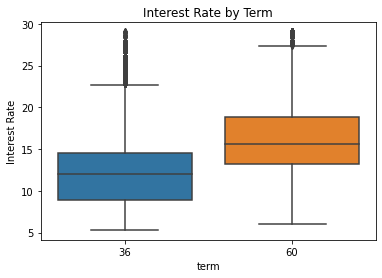

In [16]:
ax = plt.axes()
sns.boxplot(x='term', y='int_rate', data=loan_copy)
ax.set(xlabel='term', 
       ylabel='Interest Rate',
       title='Interest Rate by Term');

##### Based on this graph, on average, it indicates that the longer the loan period, the higher the interest rate charged to the borrower.

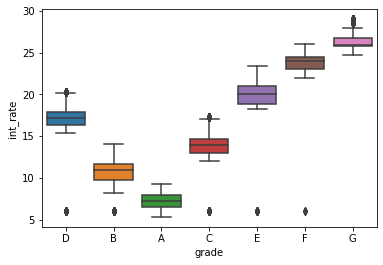

In [17]:
sns.boxplot(y='int_rate', x='grade',data=loan_copy)
ax.set(xlabel='Grade', 
       ylabel='Interest Rate',
       title='Interest Rate by Grade');

##### Based on this graph, we can detect there is outliers for the loan given in group B-F. We will create data frame to check the mean and minimum.

In [18]:
grade_df = loan_copy[['int_rate','grade']]
grade_df.groupby('grade').agg([np.mean, np.median, np.max, np.min])

int_rate                     
            mean median   amax   amin
grade                                
A       7.220815   7.26   9.25   5.32
B      10.770808  10.99  14.09   6.00
C      13.972220  13.98  17.27   6.00
D      17.221128  17.14  20.31   6.00
E      20.008710  19.99  23.40   6.00
F      23.875162  23.99  26.06   6.00
G      26.217224  25.89  28.99  24.70

##### Our suspicious is true since the minimum interest rate in group B-F are 6. We will remove this outliers and re-check.

In [18]:
loan_copy = loan_copy.drop(loan_copy[(loan_copy.grade == 'B') & (loan_copy.int_rate < 7)].index)
loan_copy = loan_copy.drop(loan_copy[(loan_copy.grade == 'C') & (loan_copy.int_rate < 7)].index)
loan_copy = loan_copy.drop(loan_copy[(loan_copy.grade == 'D') & (loan_copy.int_rate < 7)].index)
loan_copy = loan_copy.drop(loan_copy[(loan_copy.grade == 'E') & (loan_copy.int_rate < 7)].index)
loan_copy = loan_copy.drop(loan_copy[(loan_copy.grade == 'F') & (loan_copy.int_rate < 7)].index)

In [ ]:
sns.boxplot(y='int_rate', x='grade',data=loan_copy)

##### Similarly to grade, it seems that there is a correlation between sub_grade and int_rate. 

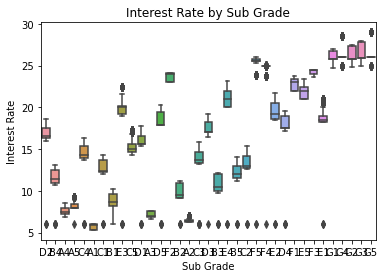

In [19]:
ax = plt.axes()
sns.boxplot(y='int_rate', x='sub_grade',data=loan_copy)
ax.set(xlabel='Sub Grade', 
       ylabel='Interest Rate',
       title='Interest Rate by Sub Grade');

##### Now the outliers are gone. We are good to go to the next exploration.

##### Next step, check the outliers in the variables that take a form as 'currency/money' 

In [ ]:
m_df = loan_copy[['int_rate','loan_amnt','annual_inc','installment','revol_bal','tot_cur_bal','tot_coll_amt']]
m_df

In [ ]:
m_df.hist(figsize=(15, 20))

##### It seems there are an outliers in annual_inc, revol_bal, and tot_cur_bal. Let's take a look in the scatter plot.

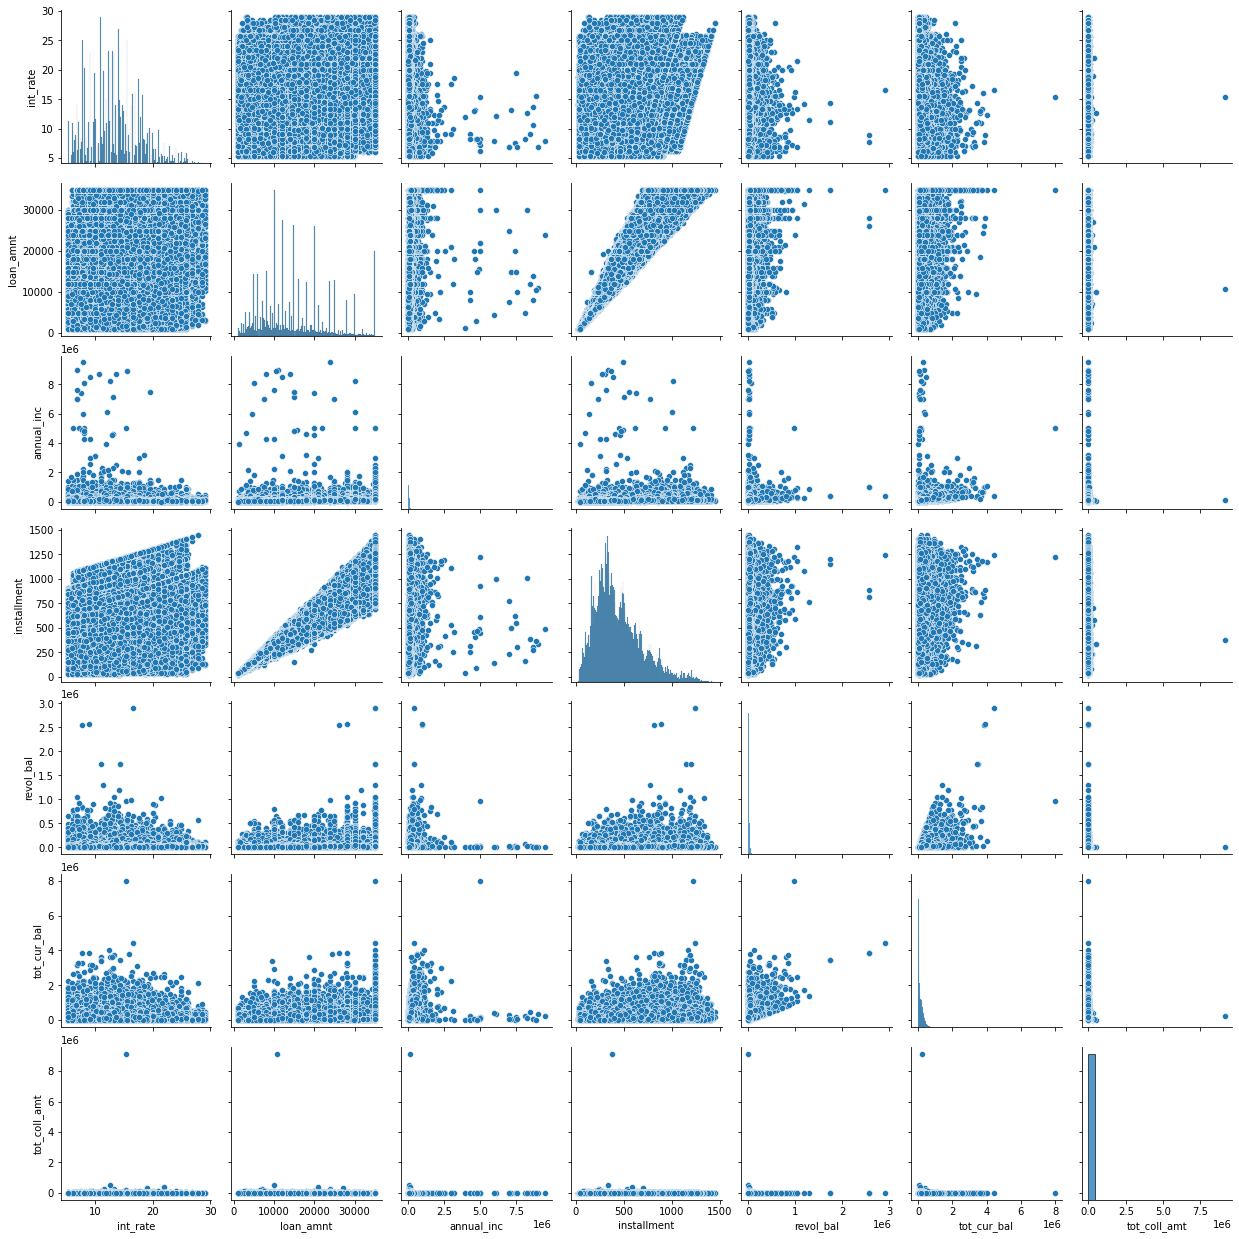

In [22]:
sns.pairplot(m_df)

In [ ]:
m_df.describe().T

##### The suspicion of outliers can be confirmed by looking at the pair plot and table above. There are huge differences between 75% quantile and the max value. Those outliers then must be removed. We will remove outliers in the annual_inc, revol_bal, and tot_cur bal.

##### We will use interquartile (IQR) method to remove the outliers. The spread and distribution of the observation should be better if we can set the max of the data point that should be included in the dataframe. We will check the max distribution in the m_df and later adjust it in the main dataframe loan_copy

In [ ]:
Q1 = m_df.quantile(0.25)
Q3 = m_df.quantile(0.75)
IQR = Q3-Q1
print(IQR)

In [ ]:
m_df = m_df[~((m_df< (Q1 - 1.5 * IQR)) |(m_df> (Q3 + 1.5 * IQR))).any(axis=1)]

##### Based on these table, we obtained the necessary information regarding the max value of each variables. 

In [ ]:
m_df.describe().T

##### Make adjustment on the main data frame; remove observations which are consider as outlier.

In [23]:
##### After chechking the original dataset, the high value of annual income do not match with the jobs title. 
loan_copy.drop(loan_copy.loc[loan_copy['annual_inc']>156000].index, inplace=True)
loan_copy.drop(loan_copy.loc[loan_copy['revol_bal']>42849].index, inplace=True)
loan_copy.drop(loan_copy.loc[loan_copy['tot_cur_bal']>475714].index, inplace=True)
loan_copy.drop(loan_copy.loc[loan_copy['tot_coll_amt']>1500].index, inplace=True)

In [ ]:
loan_copy.describe().T

##### Let's check some of the variable. We can see that the distribution now is better.

In [ ]:
# Distribution for total collection amount ever owed.
ax = plt.axes()
ax.scatter(loan_copy.tot_coll_amt, loan_copy.int_rate)

In [ ]:
# Distribution for annual income.
ax = plt.axes()
ax.hist(loan_copy.annual_inc)

##### Remove outliers of revol_bal and dti as by definition of the variables it is support not higher than 100.

In [24]:
loan_copy.drop(loan_copy.loc[loan_copy['revol_util']>100].index, inplace=True)
loan_copy.drop(loan_copy.loc[loan_copy['dti']>100].index, inplace=True)

##### Convert all variable with data type object into numeric.

In [ ]:
#Check the data types
loan_copy.dtypes

##### Convert all variables with data type 'object' into 'category'

In [25]:
loan_copy["term"] = loan_copy['term'].astype('category')
loan_copy["grade"] = loan_copy['grade'].astype('category')
loan_copy["sub_grade"] = loan_copy['sub_grade'].astype('category')
loan_copy["emp_length"] = loan_copy['emp_length'].astype('category')
loan_copy["verification_status"] = loan_copy['verification_status'].astype('category')
loan_copy["home_ownership"] = loan_copy['home_ownership'].astype('category')
loan_copy["issue_d"] = loan_copy['issue_d'].astype('category')
loan_copy["purpose"] = loan_copy['purpose'].astype('category')
loan_copy["addr_state"] = loan_copy['addr_state'].astype('category')
loan_copy["earliest_cr_line"] = loan_copy['earliest_cr_line'].astype('category')

In [ ]:
loan_copy.dtypes

##### Do label enconding to the variables with datatype 'category'. This way it shall convert these variables into ordinal numbers.

##### All the dataset now is only contains number and ready to pass as an input for the regression model building. 


In [26]:
loan_copy["grade"] = loan_copy["grade"].cat.codes
loan_copy["sub_grade"] = loan_copy["sub_grade"].cat.codes
loan_copy["emp_length"] = loan_copy["emp_length"].cat.codes
loan_copy["home_ownership"] = loan_copy["home_ownership"].cat.codes
loan_copy["issue_d"] = loan_copy["issue_d"].cat.codes
loan_copy["purpose"] = loan_copy["purpose"].cat.codes
loan_copy["addr_state"] = loan_copy["addr_state"].cat.codes
loan_copy["earliest_cr_line"] = loan_copy["earliest_cr_line"].cat.codes

#loan_copy

In [27]:
 from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Copy of the data
data_ohc = loan_copy[['verification_status', 'term']]

In [28]:
# Get one hot encoding
one_hot = pd.get_dummies(data_ohc)
#one_hot

In [29]:
# Drop the original column as it is now encoded
loan_copy = loan_copy.drop(['verification_status', 'term'] ,axis = 1)
# Join the encoded data frame
loan_copy = loan_copy.join(one_hot)
#loan_copy

##### We will also make a copy of the dataset and try to convert several variables into binary using One Hot Enconding. We will compare the result in the regression train and test section.

##### Some of the numeric variables will be standardized in order to pass the regularization method. We will use the data frame m_df that already made before to test which normalization method works better.

In [30]:
from scipy.stats.mstats import normaltest

log_data = np.sqrt(m_df)

In [ ]:
log_data.describe().T

In [ ]:
normaltest(log_data.values)

In [ ]:
log_data.hist(figsize=(15, 20))

In [31]:
# Drop the original column as it is now transformed
loan_copy = loan_copy.drop(['int_rate','loan_amnt','annual_inc','installment','revol_bal','tot_cur_bal','tot_coll_amt','grade'] ,axis = 1)
# Join the tranformed data frame
loan_copy = loan_copy.join(log_data)
#loan_copy.describe().T

## STEP 4: Correlation Matrix

##### Using the correlation matrix plot with all variables, we can see that loan amount correlation to the interest rate is actually insignificant (only 14.5%). While there are several parameter scored higher significant value than the loan amount.

In [32]:
corr = loan_copy.corr()
corr.style.background_gradient(cmap='RdBu_r')

,sub_grade,emp_length,home_ownership,issue_d,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,term_36,term_60,int_rate,loan_amnt,annual_inc,installment,revol_bal,tot_cur_bal,tot_coll_amt
sub_grade,1.000000,-0.000958,0.064131,-0.004757,0.187373,0.004471,0.180241,0.051834,0.108358,0.229039,-0.003595,0.058412,0.245923,-0.040111,0.019589,0.027388,-0.237799,0.039401,0.194293,-0.451022,0.451022,0.972437,0.137910,-0.116361,0.126002,-0.026403,-0.076764,0.031727
emp_length,-0.000958,1.000000,0.067768,-0.014200,-0.005235,-0.010375,-0.016267,-0.021754,0.158134,0.001373,0.008390,-0.026266,0.004526,-0.039570,-0.001468,-0.004429,0.046019,0.029347,-0.076089,0.005468,-0.005468,0.001163,-0.008339,-0.000252,-0.006192,-0.029545,-0.014230,-0.001744
home_ownership,0.064131,0.067768,1.000000,0.025447,0.030851,-0.075009,0.009487,-0.049571,0.172050,-0.035151,-0.100943,0.003738,-0.006331,-0.193922,0.008438,-0.016612,-0.008181,0.035217,-0.028566,0.111351,-0.111351,0.064545,-0.174536,-0.236029,-0.143938,-0.168746,-0.617993,-0.017868
issue_d,-0.004757,-0.014200,0.025447,1.000000,-0.009669,0.008479,0.087027,0.038911,0.072687,-0.099385,0.050507,0.077154,-0.089548,0.010257,0.044774,0.014576,-0.031887,0.155539,-0.130367,-0.069851,0.069851,-0.164160,0.020133,0.012576,-0.022754,-0.030885,-0.002795,0.063777
purpose,0.187373,-0.005235,0.030851,-0.009669,1.000000,-0.003865,-0.063134,0.021810,0.029297,0.036487,-0.065473,0.029137,-0.095719,-0.052123,0.005311,0.005046,-0.008009,-0.025238,0.034199,0.055047,-0.055047,0.179650,-0.187173,-0.012971,-0.167592,-0.177378,-0.048380,0.022610
addr_state,0.004471,-0.010375,-0.075009,0.008479,-0.003865,1.000000,0.038021,0.011184,-0.016340,-0.000575,0.026412,-0.014092,0.006418,0.042272,0.005274,0.004347,0.003902,-0.001574,-0.002222,-0.026219,0.026219,0.002908,0.017840,0.003471,0.010726,0.027391,0.038087,0.018198
dti,0.180241,-0.016267,0.009487,0.087027,-0.063134,0.038021,1.000000,-0.005050,-0.024650,-0.001179,0.296393,-0.052917,0.157877,0.230011,-0.002431,0.008106,-0.081524,-0.006952,0.087908,-0.106434,0.106434,0.167650,0.052448,-0.220761,0.042449,0.252255,0.092831,-0.014672
delinq_2yrs,0.051834,-0.021754,-0.049571,0.038911,0.021810,0.011184,-0.005050,1.000000,-0.086474,0.028259,0.054410,-0.019531,-0.021043,0.127911,0.062679,0.128864,-0.003077,0.015100,-0.012675,0.002819,-0.002819,0.048895,-0.007070,0.074342,-0.000538,-0.079723,0.071296,0.018518
earliest_cr_line,0.108358,0.158134,0.172050,0.072687,0.029297,-0.016340,-0.024650,-0.086474,1.000000,-0.009289,-0.101198,-0.081512,0.007063,-0.262606,-0.003698,-0.024553,0.038797,0.034883,-0.074706,0.041393,-0.041393,0.098297,-0.137777,-0.173191,-0.122475,-0.215347,-0.138246,-0.002665
inq_last_6mths,0.229039,0.001373,-0.035151,-0.099385,0.036487,-0.000575,-0.001179,0.028259,-0.009289,1.000000,0.121633,0.070691,-0.086919,0.143953,0.010569,-0.003526,-0.058488,-0.028063,0.087091,0.002543,-0.002543,0.241433,-0.034267,0.050185,-0.003480,-0.056266,0.031998,0.023476


##### Based on the correlation metrix, we can expect that sub_grade (as well as grade), term, revol utilization should have strong influence to the interest rate. This speculation will be confirmed once all linear regression models are tested and check the coefficient values of each variables.

## STEP 5: Splitting Train and Test dataset 

##### Create a split of train and test dataset for model testing with sample size of respectively 70%:30%.

In [33]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold, cross_val_predict,train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge,RidgeCV, LassoCV, ElasticNet, ElasticNetCV
from sklearn.pipeline import Pipeline,make_pipeline

In [34]:
X = loan_copy.drop('int_rate', axis=1)
y = loan_copy['int_rate']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

##### Define the 10K-Fold validation parameter

In [36]:
kf = KFold(shuffle=True, n_splits=10, random_state=700000)

## STEP 6: MODEL TESTING
##### There are 4 regression models will be tested in this section.
### MODEL 1: MULTIPLE LINEAR REGRESSION

In [37]:
lr = LinearRegression()

multireg = lr.fit(X_train,y_train)
multireg_train_pred = multireg.predict(X_train)
multireg_test_pred = multireg.predict(X_test)
multireg_CV = cross_val_predict(multireg, X_train, y_train, cv=kf)

In [38]:
error_df = list()

In [39]:
error_df.append(pd.Series({'train': mean_squared_error(y_train, multireg_train_pred, squared=False),
                           'test' : mean_squared_error(y_test,  multireg_test_pred, squared=False),
                           'CV' : mean_absolute_error(y_train,  multireg_CV),
                           'R2' : r2_score(y_train, multireg_CV)},
                           name='Multiple Linear Regression'))
error_df

[train    0.100625
 test     0.099927
 CV       0.078310
 R2       0.972216
 Name: Multiple Linear Regression, dtype: float64]

In [40]:
multireg_intrate_pred = pd.DataFrame(multireg_test_pred)
multireg_intrate_pred.columns =['multireg']

In [41]:
intrate_actual = y_test.values
intrate_actual = pd.DataFrame(intrate_actual)
intrate_actual.columns =['Actual Int Rate']

In [42]:
multireg.fit(X, y)
m= pd.Series(multireg.coef_, index = X.columns)
m = pd.DataFrame(m)
m.columns =['multireg']

##### Error data frame and the comparison of actual interest value and predicted interest rate value for each regression model will present at the end of this section.

### MODEL 2: RIDGE REGRESSION

#### Finding best lambda hyperparameter

In [43]:
alps = 10**np.linspace(10,-2,100)*0.5
params = {"ridge__alpha": alps}
pipe = make_pipeline(Ridge())

In [44]:
grid = GridSearchCV(pipe, params, scoring='neg_mean_absolute_error', cv=kf, n_jobs=-1)
grid.fit(X_train, y_train)
grid.best_params_

{'ridge__alpha': 0.005}

##### The best alpha is 0.005, it will be used in the model fit later on

In [45]:
#pip install plotnine
from plotnine import ggplot, aes, geom_line

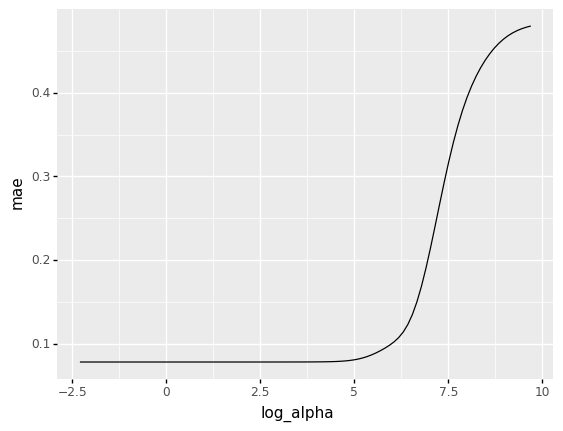

<ggplot: (132805889916)>

In [51]:
results = pd.DataFrame(grid.cv_results_)
results['log_alpha'] = results.param_ridge__alpha.apply(lambda x: np.log10(x))
results['mae'] = results.mean_test_score * -1

(ggplot(results, aes(x='log_alpha', y='mae')) + geom_line())

##### Test the model with best alpha 0.005

In [46]:
ridge1 = Ridge(alpha = 0.005, normalize = True)
ridge1.fit(X_train, y_train)

Ridge(alpha=0.005, normalize=True)

In [47]:
error_df.append(pd.Series({'train': mean_squared_error(y_train, ridge1.predict(X_train),squared=False),
                           'test' : mean_squared_error(y_test, ridge1.predict(X_test),squared=False),
                           'CV' : format(grid.best_score_ * -1),
                           'R2' : ridge1.score(X_train, y_train)},
                           name='Ridge Regression'))
error_df

[train    0.100625
 test     0.099927
 CV       0.078310
 R2       0.972216
 Name: Multiple Linear Regression, dtype: float64,
 train              0.100725
 test               0.100046
 CV       0.0783098073164099
 R2                 0.972165
 Name: Ridge Regression, dtype: object]

##### Check which variables coefficient is set to zero by Ridge Regression

In [48]:
ridge1.fit(X, y)
r= pd.Series(ridge1.coef_, index = X.columns)
r = pd.DataFrame(r)
r.columns =['ridge']

In [50]:
ridge_test_pred = ridge1.predict(X_test)
ridge_intrate_pred = pd.DataFrame(ridge_test_pred)
ridge_intrate_pred.columns =['ridge']

### MODEL 3: LASSO

In [51]:
alphas = np.logspace(-7, -0.5, 30)
param = {"lasso__alpha": alphas}
pipes = make_pipeline(Lasso(max_iter=10000, normalize=True))

In [ ]:
alphas

In [52]:
grid1 = GridSearchCV(pipes, param, scoring='neg_mean_absolute_error', cv= kf, n_jobs=-1)
grid1.fit(X_train, y_train)
grid1.best_params_

{'lasso__alpha': 1e-07}

##### Best alpha for Lasso is 1.02e-07. The alpha will be used to fit in the Lasso model.

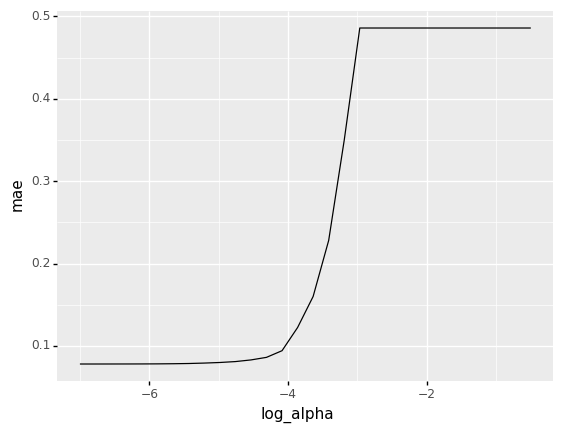

<ggplot: (132791238413)>

In [135]:
results = pd.DataFrame(grid1.cv_results_)
results['log_alpha'] = results.param_lasso__alpha.apply(lambda x: np.log10(x))
results['mae'] = results.mean_test_score * -1

(ggplot(results, aes(x='log_alpha', y='mae')) + geom_line())

In [53]:
lasso = Lasso(alpha =  1.02e-07, normalize = True)
lasso.fit(X_train, y_train)

Lasso(alpha=1.02e-07, normalize=True)

In [54]:
error_df.append(pd.Series({'train': mean_squared_error(y_train, lasso.predict(X_train), squared=False),
                           'test' : mean_squared_error(y_test, lasso.predict(X_test), squared=False),
                           'CV' : format(grid1.best_score_ * -1),
                           'R2' : lasso.score(X_train, y_train)},
                           name='Lasso'))
error_df

[train    0.100625
 test     0.099927
 CV       0.078310
 R2       0.972216
 Name: Multiple Linear Regression, dtype: float64,
 train              0.100725
 test               0.100046
 CV       0.0783098073164099
 R2                 0.972165
 Name: Ridge Regression, dtype: object,
 train                0.10063
 test               0.0999306
 CV       0.07834334974239886
 R2                  0.972217
 Name: Lasso, dtype: object]

##### Check the variables shrinkage performed by Lasso. Coefficient set to 0 means that Lasso consider these variables has less effect on the model.

In [55]:
lasso.fit(X, y)
l = pd.Series(lasso.coef_, index = X.columns)
l = pd.DataFrame(l)
l.columns =['lasso']

In [56]:
lasso_test_pred = lasso.predict(X_test)
lasso_intrate_pred = pd.DataFrame(lasso_test_pred)
lasso_intrate_pred.columns =['lasso']

#### Model Result
##### Assemble the result of train RMSE, test MSE, CV MAE, and R-squared of each linear regression model into a single data frame. Amongs all of the model, multiple linear regression is win with a very tiny gap in terms of MSE compare to two other models. The r-squared is also slihghtly a little bit better.

In [57]:
# Assemble the results
df_error = pd.concat(error_df, axis=1)
df_error= df_error.astype('float64')
df_error.round(decimals=6)
df_error

,Multiple Linear Regression,Ridge Regression,Lasso
train,0.100625,0.100725,0.100630
test,0.099927,0.100046,0.099931
CV,0.078310,0.078310,0.078343
R2,0.972216,0.972165,0.972217


##### Assemble the actual target value and predicted value generated by each linear regression model. We will compare the result as for df.head=15. There is no significant difference if we compare the interest rate prediction from all linear regression model with the actual target interest rate.

In [58]:
result = multireg_intrate_pred.join(ridge_intrate_pred)
result = result.join(lasso_intrate_pred)
result = pd.concat([intrate_actual, result], axis=1)
result.head(n=15)

,Actual Int Rate,multireg,ridge,lasso
0,2.497999,2.548468,2.554387,2.549287
1,4.121893,4.165458,4.161620,4.164684
2,3.562303,3.522525,3.522483,3.520882
3,2.983287,2.998163,3.001821,2.998819
4,3.505710,3.422566,3.422069,3.423137
5,4.060788,4.082529,4.087381,4.083499
6,3.382307,3.261019,3.264486,3.261346
7,3.562303,3.529626,3.536917,3.532030
8,3.548239,3.526948,3.524744,3.526443
9,3.806573,3.835778,3.840001,3.836052


##### Assemble the coefficient value by each linear regression model. Compare which coefficient is shrinkage to 0 by each method.

In [59]:
coef = m.join(r)
coef = coef.join(l)
coef

,multireg,ridge,lasso
sub_grade,0.090053,0.088617,0.089815
emp_length,-0.000024,-0.000038,-0.000000
home_ownership,-0.000500,-0.000425,-0.000365
issue_d,-0.111027,-0.109750,-0.110622
purpose,-0.000511,0.000121,-0.000435
addr_state,0.000003,0.000002,0.000000
dti,0.000187,0.000244,0.000175
delinq_2yrs,0.004396,0.004693,0.004307
earliest_cr_line,0.000265,0.000310,0.000251
inq_last_6mths,0.004610,0.005899,0.004524


##### Based on the table above, it can be concluded that only Lasso model can shrinkage several model parameters to zero, while others is still keep all parameters although they have low coefficient value.

### Model Testing Review

##### There are few consideration that will be taken to choose the best model. 
##### First, in terms of RMSE and R2, all models demonstrate similar result. Both multilinear regression and Lasso are demonstrating a promising result. Therefore, we need to see other aspect that can help for the decision making for the best model.
##### Second, in terms of prediction fro the interest rate value, all models is deviate on average 2-3% from the actual target value. Again, both multilinear regression and Lasso are demonstrating a promising result.
##### Third, only Lasso able to shrinkage some model coefficient to zero, dropping those variates variables from the model. On contrast, other regularization techniques like multilinear and ridge tend to keep all variates. If we see the parameter drops by Lasso, it is actually makes sense for the interest rate prediction. Those coefficient that set to zero, in the real world case also will not give an impact to the interest rate determination. As we have seen in the correlation matrix in Step 4, term, sub-grade, and revol utilization are the main parameters that play a big role in determining interest rate.
##### Therefore, Lasso is choosen to be the first option for the final model that best fits with this dataset in terms of accuracy and explainability. 

## STEP 7: Summary

### Exploratory Data Analysis Insight
##### Based on the correlation matrix and box plot created before, there are at least 3 variables that shows a high correlation with the interest rate. Some insight that can be understood from those analysis:
##### 1) There are two term of loan in the dataset, namely 3 years and 5 years. Based on the boxplot, the longer the loan term, the highest the interest rate. Similarly, the correlation matrix indicates a moderate correlation between term and interest rate.
##### 2) There are six types of grade, from A to F. Based on the boxplot, the worst the borrowers grade rating, the highest the interest rate. Similar condition also can be seen in the sub grade. 
##### 3) Based on the correlation matrix, it indicates a very strong correlation between interest rate and term and sub-grade. It can be seen in the coefficient of model test, sub-grade and term have bigger coef value compare to others.

### Quality of Data Set
##### The data set is very comprehensive, consisting of 75 variables with more than 790,000 entries related past information of each loan borrowers. There are a lot of noise, inconsistency, and irrelevancy in the entries that need to be taken care carefully. The amount of data that can not be used for the processing due to outliers/incomplete observations is consider high. Approximately 18% of the observations is filtered out from the original dataset. Furthermore, the last data entries was captured for a loan that given in 2015. If the interest rate model prediction using machine learning aim to be used today, the dataset is out-to-dated and it might affect the performance of the prediction. It would be better to have additional up-to-date dataset in order to reflect the current situation better. 

### Missing Information
##### Another additional information that necessary for this case is the central bank interest rate in each point of time (in this case is the Fed interest rate). Normally the lending interest rate that set up by banks and financial institusion also reflect of the interest rate determined by the central bank of their country. We should clarify if this assumption is true or not.

### Model Testing
##### This study deployed three linear regression model (multilinear, ridge, and lasso) with same train and test split and similar cross validation method. The ridge and lasso regression is using the best lambda penalty to fit the model prediction. All three models demonstrate a good RMSE and the value is all closely the same. In terms of coefficient prediction, only Lasso able to shrinkage some model coefficient to zero, dropping those variates variables from the model. This is the main consideration to choose Lasso model since it can demonstrate both accuracy and model interpretability, reflecting which variables that actually important in determining interest rate.

### Sugesstion
##### The future plan is to revisit again the model and apply neural network solution to compare whether deep learning method could generate better result in predicting interest rate or not. This result also should be discussed with an expert in the lending loan activity, to compare whether our coefficient prediction is actually inline with the real world situation or not. Any input or sugesstion from the expert is essential to improve the machine learning model and understand better the reality.

### Objective Outcome
##### In brief, this study able to deliver it objectives that set in the beginning: Provide an algorithm to automate interest rate prediction in the case of new lending in the bank or financial institution. Important to note that this study do not take into account the possibility whether new borrowers will defaulted or not in their loan. This algorithm is only aims to provide the correct interest rate amount that should be charged for the new borrowers. The linear regression algorithm model in this study able to generate interest rate prediction with low MSE, on average 0.0097.